# Logistic Regression
---

### Objectives:

- Use Logistic Regression for classification

- Preprocess data for modeling

- Implement Logistic regression on real world data

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# Warnings
import warnings
warnings.filterwarnings('ignore')

No such comm: LSP_COMM_ID


### Load the data

In [0]:
df = pd.read_csv('./data/ChurnData.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
43,43.0,21.0,1.0,25.0,1.0,4.0,0.0,0.0,0.0,7.60,0.00,0.00,0.00,0.0,334.45,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.028,3.240,3.219,2.0,1.0
55,15.0,35.0,5.0,34.0,3.0,8.0,1.0,0.0,0.0,5.15,0.00,25.55,0.00,0.0,110.55,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.639,3.240,3.526,2.0,1.0
74,43.0,27.0,3.0,21.0,2.0,1.0,0.0,1.0,0.0,12.65,0.00,0.00,16.50,0.0,558.85,0.00,760.0,0.0,0.0,0.0,0.0,0.0,0.0,2.538,3.240,3.045,2.0,0.0
122,24.0,35.0,10.0,41.0,5.0,6.0,1.0,0.0,0.0,3.30,0.00,30.30,0.00,0.0,88.65,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.194,3.240,3.714,2.0,0.0
182,32.0,44.0,10.0,201.0,2.0,24.0,0.0,1.0,0.0,7.65,28.00,0.00,18.50,0.0,237.85,895.05,595.0,0.0,1.0,0.0,1.0,1.0,0.0,2.035,3.332,5.303,3.0,0.0
125,72.0,75.0,48.0,14.0,2.0,6.0,0.0,1.0,0.0,37.30,0.00,0.00,109.25,0.0,2686.25,0.00,7515.0,0.0,0.0,0.0,0.0,0.0,0.0,3.619,3.240,2.639,2.0,0.0
34,18.0,69.0,11.0,58.0,3.0,8.0,1.0,1.0,1.0,6.35,27.25,53.95,11.75,63.0,118.05,454.05,175.0,1.0,1.0,1.0,1.0,1.0,1.0,1.848,3.305,4.060,4.0,0.0
22,45.0,22.0,2.0,36.0,4.0,0.0,1.0,0.0,0.0,9.95,14.75,26.15,0.00,0.0,412.10,663.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.298,2.691,3.584,2.0,1.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### Understand the data
---

#### Scenario

A telecommunications company is concerned about the number of customers migrating from its fixed-line telephone services to cable TV competitors. They need to understand who is most likely to leave the company.

#### Loading Telecommunications Churn Data

Telecommunications Churn is a hypothetical data file that describes a telecommunications company's efforts to reduce customer churn. Each case corresponds to a different customer and records various demographic and service usage information.

#### About the Dataset

This is a historical customer dataset, where each row represents a customer. It is typically less expensive to retain customers than to acquire new ones, therefore the focus of this analysis is to predict which customers will remain with the company.

This dataset provides information about customer preferences, chosen services, personal details, etc., which helps predict customer churn.

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

### Note:

For this project, only some variables from the dataset will be used in order to simplify it. As a selection criterion, I will be choosing the variables with the strongest correlation to the target variable.

### Checking the correlations between the variables

In [0]:
df.corr()['churn'].abs().sort_values(ascending = False)

churn       1.000000
tenure      0.376860
employ      0.337969
loglong     0.336869
callcard    0.311451
longten     0.294906
longmon     0.292026
age         0.287697
equip       0.275284
address     0.260659
equipmon    0.255348
internet    0.254838
ebill       0.254838
cardten     0.228634
ed          0.216112
wiremon     0.177483
cardmon     0.177163
wireless    0.174356
voice       0.142315
pager       0.124623
lninc       0.117459
income      0.090790
confer      0.081361
logtoll     0.070156
tollten     0.059482
callwait    0.052885
custcat     0.014839
tollmon     0.014356
Name: churn, dtype: float64

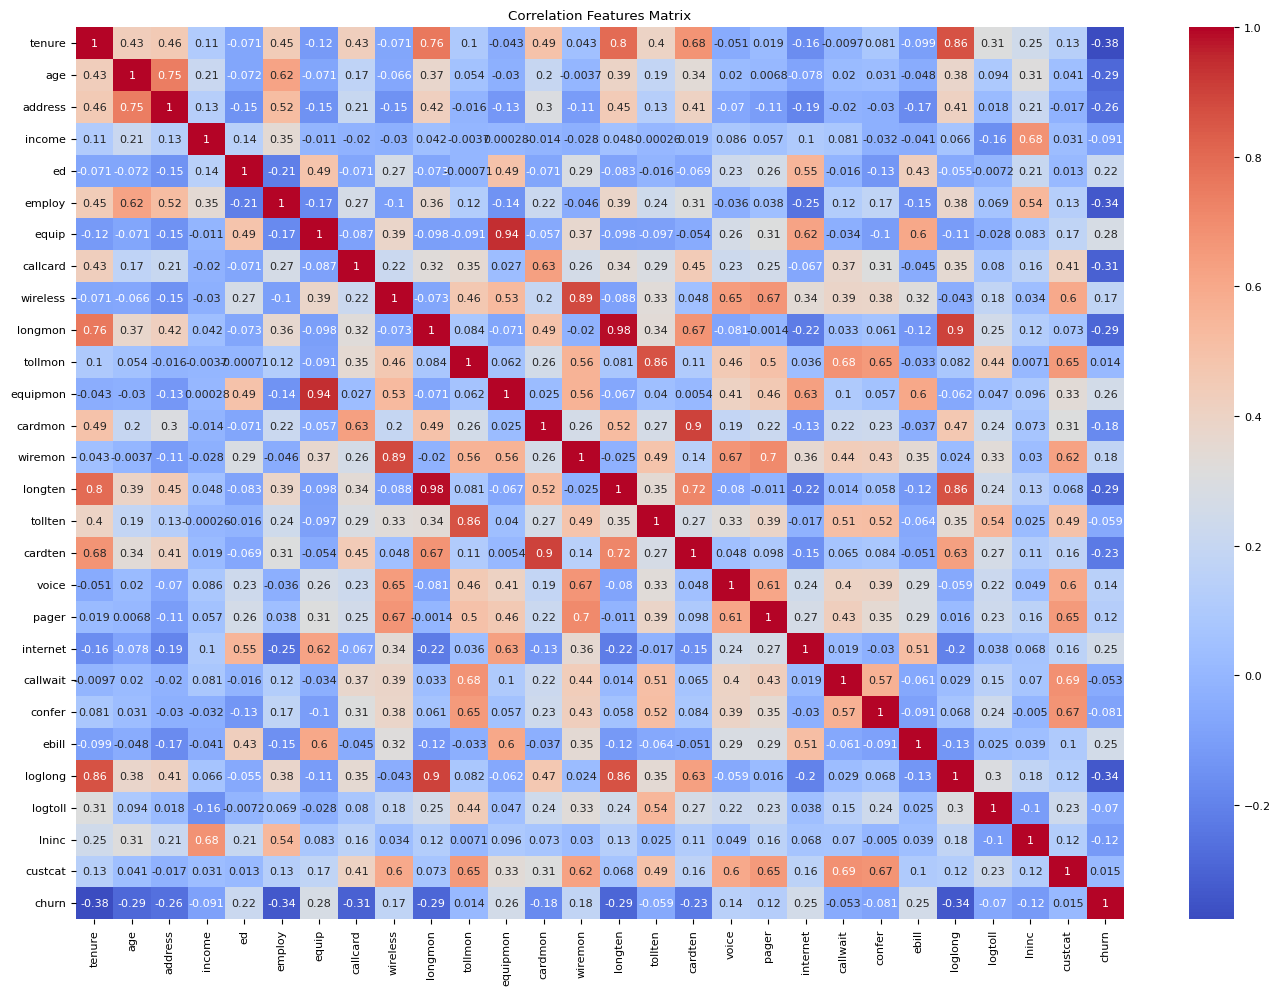

In [0]:
plt.rc('font', size = 8)
fig, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', ax = ax)
ax.set_title('Correlation Features Matrix')
plt.tight_layout()
plt.show()

In [0]:
# Dropping features of low correlation with the target variable

df = df.drop(columns = ['income', 'confer', 'logtoll', 'tollten', 'callwait', 'custcat', 'tollmon'])
df.head()

,tenure,age,address,ed,employ,equip,callcard,wireless,longmon,equipmon,cardmon,wiremon,longten,cardten,voice,pager,internet,ebill,loglong,lninc,churn
0,11.0,33.0,7.0,5.0,5.0,0.0,1.0,1.0,4.40,0.0,15.25,35.7,42.00,125.0,1.0,1.0,0.0,0.0,1.482,4.913,1.0
1,33.0,33.0,12.0,2.0,0.0,0.0,0.0,0.0,9.45,0.0,0.00,0.0,288.80,0.0,0.0,0.0,0.0,0.0,2.246,3.497,1.0
2,23.0,30.0,9.0,1.0,2.0,0.0,0.0,0.0,6.30,0.0,0.00,0.0,157.05,0.0,0.0,0.0,0.0,0.0,1.841,3.401,0.0
3,38.0,35.0,5.0,2.0,10.0,1.0,1.0,1.0,6.05,50.1,23.25,64.9,239.55,880.0,1.0,1.0,1.0,1.0,1.800,4.331,0.0
4,7.0,35.0,14.0,2.0,15.0,0.0,1.0,0.0,7.10,0.0,23.75,0.0,47.45,145.0,1.0,0.0,0.0,0.0,1.960,4.382,0.0


### Extract the input features and labels from the data set
Extract the required columns and convert the resulting dataframes to NumPy arrays.


In [0]:
# Shape Dataset
df.shape

(200, 21)

In [0]:
df['churn'] = df['churn'].astype('int')
X = df.iloc[:, 0: 20].to_numpy()
y = df.iloc[:, 20].to_numpy()

print(f'The shape X train {X.shape}')
print(f'The shape y train {y.shape}')


The shape X train (200, 20)
The shape y train (200,)


### Preprocess selected features an train test split

Create train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

The next step is to standardize the input variables so that the model does not inadvertently favor any variable due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation.

In [0]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [0]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.429962,0.243414,-0.668182,-1.425707,0.646723,1.148408,-1.505093,-0.625543,-0.706761,0.476765,-1.055261,-0.552330,-0.742829,-0.767836,-0.67420,-0.635223,-0.904534,-0.916013,-0.916031,0.683453
1,-0.726558,-0.682043,-0.170004,0.126083,-0.559032,1.148408,-1.505093,-0.625543,-0.486709,1.031303,-1.055261,-0.552330,-0.617407,-0.767836,-0.67420,-0.635223,1.105542,1.091687,-0.373888,-1.285263
2,0.070633,-0.604921,-1.066725,-0.649812,0.208267,1.148408,0.664411,1.598611,0.458515,0.892669,-0.294712,1.164658,0.101842,-0.328964,-0.67420,1.574249,1.105542,1.091687,0.840681,0.958406
3,1.008506,-0.296435,-0.070368,0.901978,-0.120576,1.148408,0.664411,-0.625543,1.008645,1.336813,-0.461662,-0.552330,0.961027,-0.249723,-0.67420,-0.635223,1.105542,-0.916013,1.248339,1.034485
4,-0.116941,-0.604921,0.029268,0.901978,-0.339804,1.148408,0.664411,1.598611,-0.291663,0.769438,0.651335,0.505498,-0.352116,0.122099,1.48324,-0.635223,-0.904534,-0.916013,-0.022265,-0.225493


In [0]:
pd.DataFrame(X_train).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.52,-1.68,-1.17,-1.43,-1.11,-0.87,-1.51,-0.63,-0.99,-0.82,-1.06,-0.55,-0.76,-0.77,-0.67,-0.64,-0.90,-0.92,-2.25,-2.28
25%,-0.87,-0.76,-0.87,-0.65,-0.78,-0.87,-1.51,-0.63,-0.62,-0.82,-1.06,-0.55,-0.64,-0.77,-0.67,-0.64,-0.90,-0.92,-0.69,-0.77
50%,-0.12,-0.10,-0.27,0.13,-0.34,-0.87,0.66,-0.63,-0.37,-0.82,-0.10,-0.55,-0.38,-0.33,-0.67,-0.64,-0.90,-0.92,-0.15,-0.13
75%,0.93,0.78,0.75,0.90,0.76,1.15,0.66,1.60,0.26,0.88,0.52,0.51,0.27,0.34,1.48,1.57,1.11,1.09,0.66,0.63
max,1.71,2.71,3.12,1.68,3.72,1.15,0.66,1.60,5.06,2.43,3.79,4.42,5.01,5.22,1.48,1.57,1.11,1.09,2.72,4.69


A standardized variable has zero mean and a standard deviation of one.

### Build a Logistic Regression Classifier Model

In [0]:
# Create a model object
LR = LogisticRegression()

# Train the model in the training data
LR.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [0]:
# Predict the target variable in the test data
y_pred = LR.predict(X_test)
y_pred[: 10]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [0]:
# Collecting the probabilities of the model classifications
y_prob = LR.predict_proba(X_test)
y_prob[ : 10]

array([[0.08196932, 0.91803068],
       [0.85717161, 0.14282839],
       [0.96526413, 0.03473587],
       [0.67018547, 0.32981453],
       [0.99319578, 0.00680422],
       [0.67370563, 0.32629437],
       [0.19254698, 0.80745302],
       [0.82977498, 0.17022502],
       [0.28866709, 0.71133291],
       [0.55953709, 0.44046291]])

### Model Evaluation

In [0]:
coefficients = pd.Series(LR.coef_[0], index = df.columns[: - 1])
coefficients

tenure     -0.652693
age        -0.305910
address     0.159476
ed          0.008915
employ     -0.463104
equip       0.065835
callcard   -0.740602
wireless   -0.224146
longmon    -0.245463
equipmon    0.206727
cardmon     0.440484
wiremon     0.689366
longten    -0.024749
cardten    -0.383176
voice       0.111443
pager       0.016066
internet   -0.069903
ebill       0.230501
loglong     0.083485
lninc       0.127167
dtype: float64

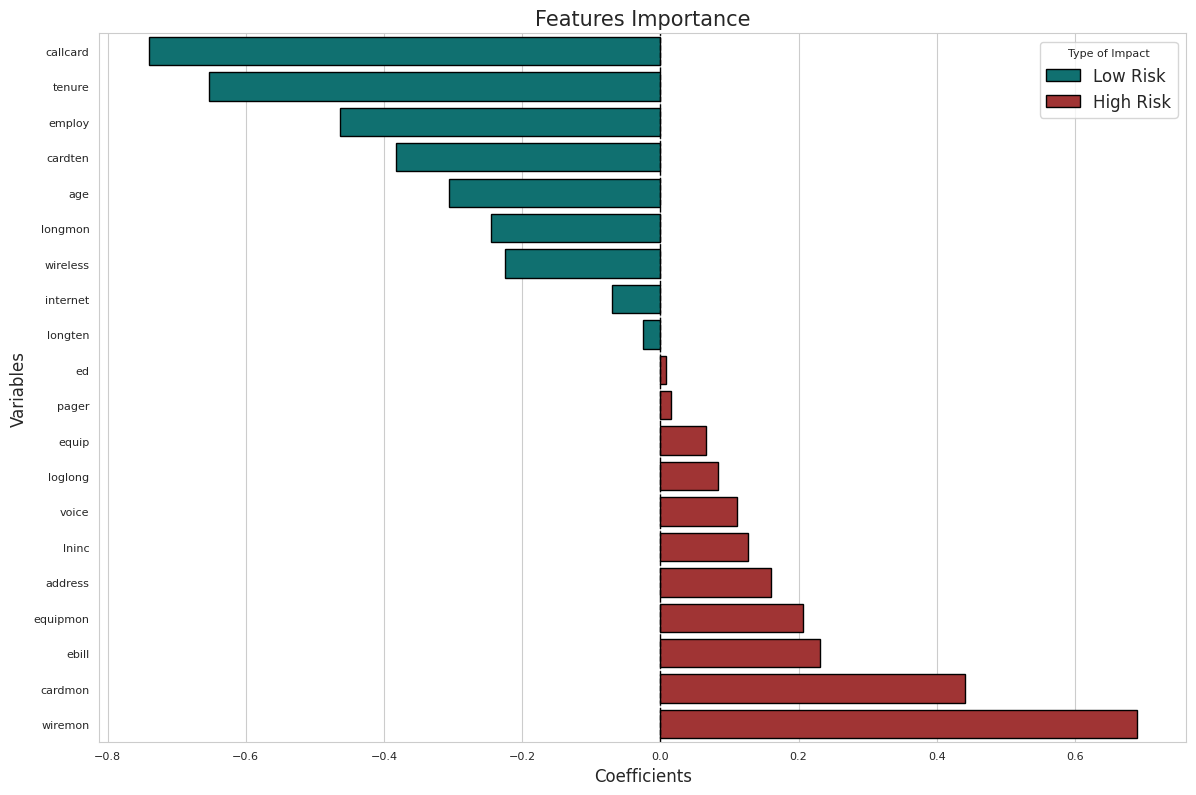

In [0]:
# Data collect
data_ax = coefficients.sort_values().reset_index()
data_ax.columns = ['Feature', 'Coefficient']

# # Creating a category to automatically "paint" the graph
# If > 0 it helps Churn (Bad/Red), if < 0 it retains the customer (Good/Blue)
data_ax['Impact'] = data_ax['Coefficient'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')

# Figure
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')

# Barplot
sns.barplot(
    data = data_ax,
    y = 'Feature',
    x = 'Coefficient',
    edgecolor = 'black',
    hue = 'Impact',
    dodge = False,
    palette = {'High Risk': 'firebrick', 'Low Risk': 'teal'}
)

plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.title('Features Importance', fontsize = 15)
plt.xlabel('Coefficients', fontsize = 12)
plt.ylabel('Variables', fontsize = 12)
plt.legend(title = 'Type of Impact', loc = 'upper right', fontsize = 12)

plt.tight_layout()
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.83      0.50      0.62        10

    accuracy                           0.85        40
   macro avg       0.84      0.73      0.77        40
weighted avg       0.85      0.85      0.84        40



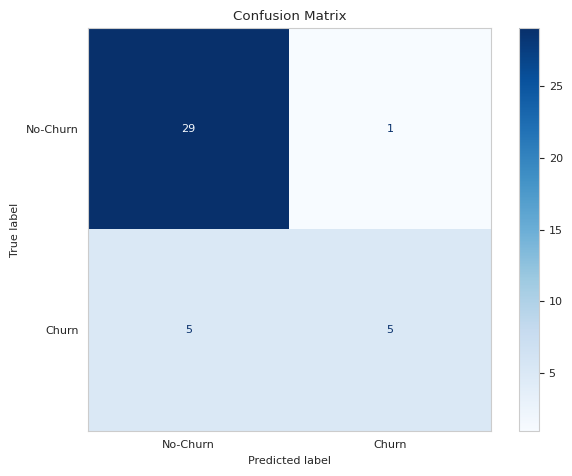

In [0]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels = ['No-Churn', 'Churn'], 
    cmap = 'Blues', 
    values_format = 'd'
)

plt.grid(False) 
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [0]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob[:, 1]):.2f}')
print(f'Root men squared error: {log_loss(y_test, y_prob[:, 1]):.2f}')

Accuracy: 0.85
AUC-ROC: 0.84
Root men squared error: 0.40


### Conclusion
---

- The developed Logistic Regression model demonstrates a certain statistical robustness and predictive capacity. With an **Accuracy of 85%** and an **Area Under the Curve (AUC-ROC) of 0.84**, the classifier exhibits a discriminatory competence far superior to chance, validating its effectiveness in distinguishing between retained customers and those prone to cancellation (*churn*).

- The analysis of the coefficients reveals clear vectors of influence on consumer behavior, divided into risk factors and protective factors:

- The variables `wiremon` (+0.69) and `cardmon` (+0.44) show the highest positive coefficients. This indicates that high monthly costs associated with wireless services and calling cards are the main drivers of the cancellation decision. There is an elastic price sensitivity in these specific services.

-  The variables `callcard` (-0.74) and `tenure` (-0.65) act as strong protective factors. Relationship longevity (*tenure*) and the use of the calling card service are inversely correlated with churn. Customers engaged in these products demonstrate greater loyalty.

- Demographic variables such as `ed` (Education) and obsolete services such as `pager` showed coefficients close to zero, indicating that they do not have significant explanatory power for this phenomenon.

- The **RMSE of 0.40** suggests that the estimated probabilities have an acceptable standard deviation in relation to the actual classes.